Version: 1

Short descriptions: Discord discovery based on Euclidian distance between adjacency matrices.

Data used: http://www.sociopatterns.org/datasets/contacts-in-a-workplace/

In [13]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#read data
dat = pd.read_table('/Users/Dovla/Downloads/tij_InVS.dat',sep=" ",header=None)
dat.columns = ['ts','w1','w2']
#label nodes so its easier to manipulate with for loops
dat['w1cat'] = pd.Categorical(dat['w1'])
dat['w1code'] = dat.w1cat.cat.codes
dat['w2cat'] = pd.Categorical(dat['w2'])
dat['w2code'] = dat.w2cat.cat.codes
#filter just nodes w new label
newDat = dat[['ts','w1code','w2code']]
newDat.head()

,ts,w1code,w2code
0,28820,63,85
1,28860,51,50
2,29300,34,82
3,29780,11,30
4,30000,28,34


In [10]:
# distance measure of two matricies
def distance(m1, m2):
    return np.sqrt(np.sum((m1 - m2) ** 2))    

In [12]:
#get max number of unique nodes
nr = max(len(newDat.w1code.unique()),len(newDat.w2code.unique()))
# hold adj matricies
adjArr = []
#loop through each time-stamp 
for ts in newDat.ts.unique():
    #filter current timestamp
    tsTemp = newDat[newDat.ts == ts]
    #generate empty adj matrix
    sArr = np.zeros((nr,nr))
    #fill adj matrix
    for i in range(tsTemp.shape[0]):
        sArr[tsTemp.w1code.iloc[i],tsTemp.w2code.iloc[i]] = 1
    #store it
    adjArr.append(sArr)

In [6]:
#hold distance measure per ts
eucDisGroup = []
#convert
adjArr1 = np.array(adjArr)
#loop through each time stamp
for j in range(adjArr1.shape[0]):
    #select current adj matrix
    curr = adjArr1[j,:,:]
    #hold distance measure for each window
    eucDisCurr = []
    #loop through each time stamp
    for i in range(adjArr1.shape[0]):
        #select current adj matrix
        slid = adjArr1[i,:,:]
        #G = nx.from_numpy_matrix(adjArr1[i,:,:])
        #calculate distance
        dist = distance(curr,slid)
        #store distance
        eucDisCurr.append(dist)
    #store mean of distances for time-stamp
    eucDisGroup.append(np.average(eucDisCurr))
#convert to DataFrame
eucDisDf = pd.DataFrame({"ts":range(len(eucDisGroup)),"val":np.array(eucDisGroup)})

In [32]:
#top k=5 discords
print(eucDisDf.sort_values(by=['val'],ascending=False).head(5))
print(eucDisDf.sort_values(by=['val'],ascending=True).head(5))

        ts       val
232    232  3.215639
2307  2307  3.213767
2480  2480  3.053352
4943  4943  3.018805
228    228  2.888254
        ts       val
6616  6616  1.408264
6666  6666  1.408264
6665  6665  1.408264
6664  6664  1.408264
6663  6663  1.408264


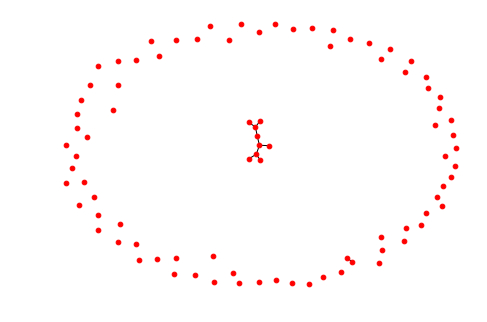

In [30]:
#plot most distance graph
G = nx.from_numpy_matrix(adjArr1[232,:,:])
nx.draw(G, node_size=22)

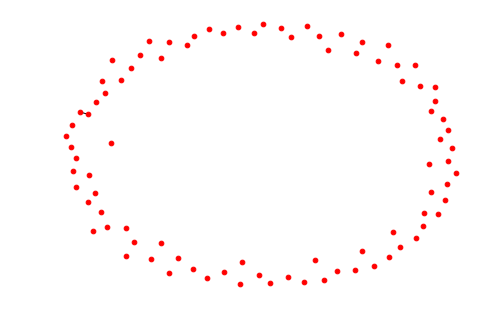

In [33]:
#plot least distant graph
G = nx.from_numpy_matrix(adjArr1[6616,:,:])
nx.draw(G, node_size=22)